## **Initializing libraries and uploading data and creating data frames**

In [3]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Set ipython's max row display
pd.set_option('display.max_row', 100)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 100)


In [0]:
# uploading data

# CES_HYBRID (original data file) : data/CES/ces_hybrid.csv
# HYBRID_FREQ (Original frequency data) : data/CES/ces_hybrid_frequency_table.xls
# PROCESSED_CES (Preprocessed CES data after transformation) : data/CES/preprocessed_ces_hybrid.csv

CES_HYBRID = '/content/ces_hybrid.csv'
HYBRID_FREQ = '/content/ces_hybrid_frequency_table.xls'
PROCESSED_CES = '/content/preprocessed_ces_hybrid.csv'

In [0]:
#creating data frames
import io
ces = pd.read_csv(PROCESSED_CES)
original = pd.read_csv(CES_HYBRID)
frequency = pd.read_excel(HYBRID_FREQ)

In [0]:
# print all the imported data
frequency=frequency.dropna(axis='columns', how='all')
#print(frequency)

original=original.dropna(axis='columns', how='all')
original=original.drop_duplicates(keep='first')
original.columns=['id','description']
#print(original)

ces=ces.dropna(axis='columns', how='all')
ces=ces.drop_duplicates(keep='first')
#print(ces)

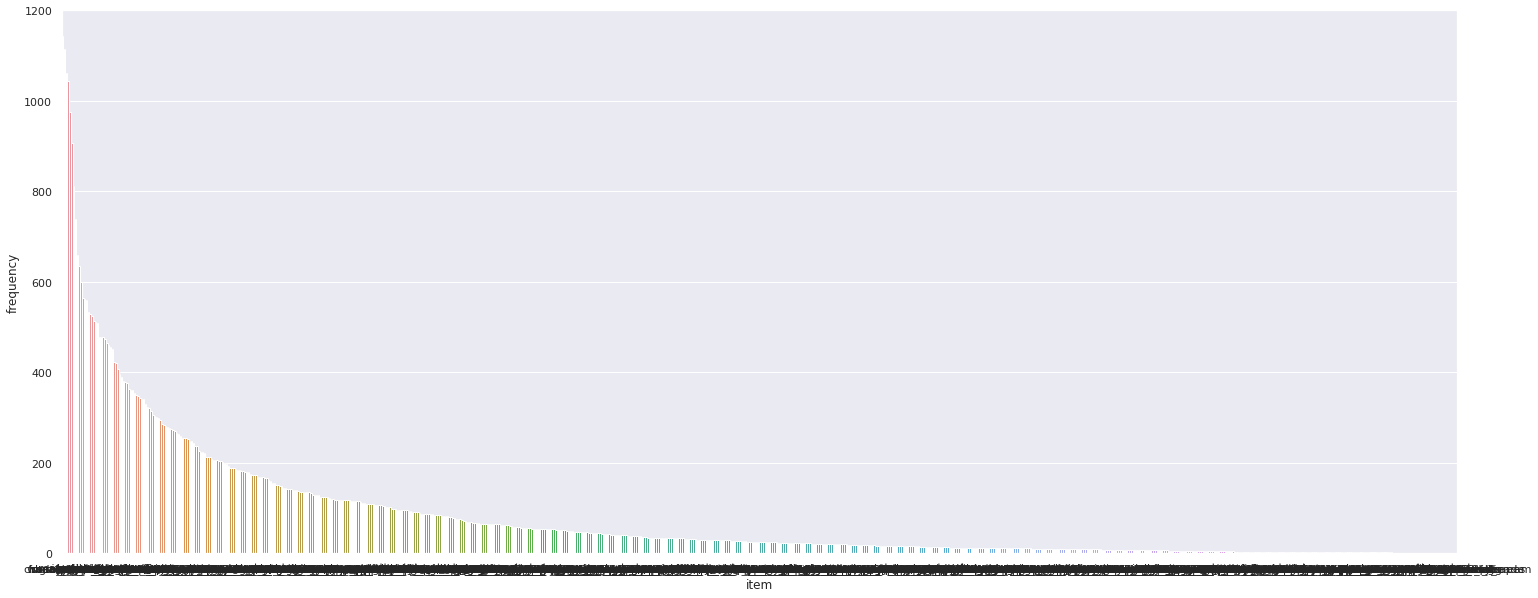

In [7]:
sns.set(rc={'figure.figsize':(25,10)})
a=sns.barplot(x = 'item', y = 'frequency', data = frequency)

## **Sort and transforming data to find out the 3 most sold items across the cities**

In [10]:
#group data by city and process the same
ces_city = ces.groupby(["city"])

ces_city.count()

,id,income,members,description
city,,,,
Belem,6140,6140,6140,6140
Belo_Horizonte,7104,7104,7104,7104
Curitiba,7459,7459,7459,7459
Florianopolis,8361,8361,8361,8361
Fortaleza,7194,7194,7194,7194
Goiania,8138,8138,8138,8138
Porto_Alegre,6847,6847,6847,6847
Recife,6617,6617,6617,6617


In [11]:
count=ces_city['description'].value_counts()
ces_city_df = count.to_frame()

ces_city_df.rename(columns = {'description':'0'}, inplace = True)

ces_city_df.head()

0
city  description     
Belem vinegar      122
      garlic       116
      egg           93
      soy_oil       91
      tomato        91

In [12]:
ces_city_df.reset_index()
ces_city_df.rename(columns = {'0':'frequency'}, inplace = True)

ces_city_df=ces_city_df.sort_values(by=['city','frequency'],ascending=[True, False]).groupby('city').head (7)
ces_city_df=ces_city_df.reset_index()
ces_city_df

,city,description,frequency
0,Belem,vinegar,122
1,Belem,garlic,116
2,Belem,egg,93
3,Belem,soy_oil,91
4,Belem,tomato,91
5,Belem,mayonnaise,88
6,Belem,butter,85
7,Belo_Horizonte,egg,166
8,Belo_Horizonte,french_bread,166
9,Belo_Horizonte,vinegar,154


### **Top 10 items sold in each city**

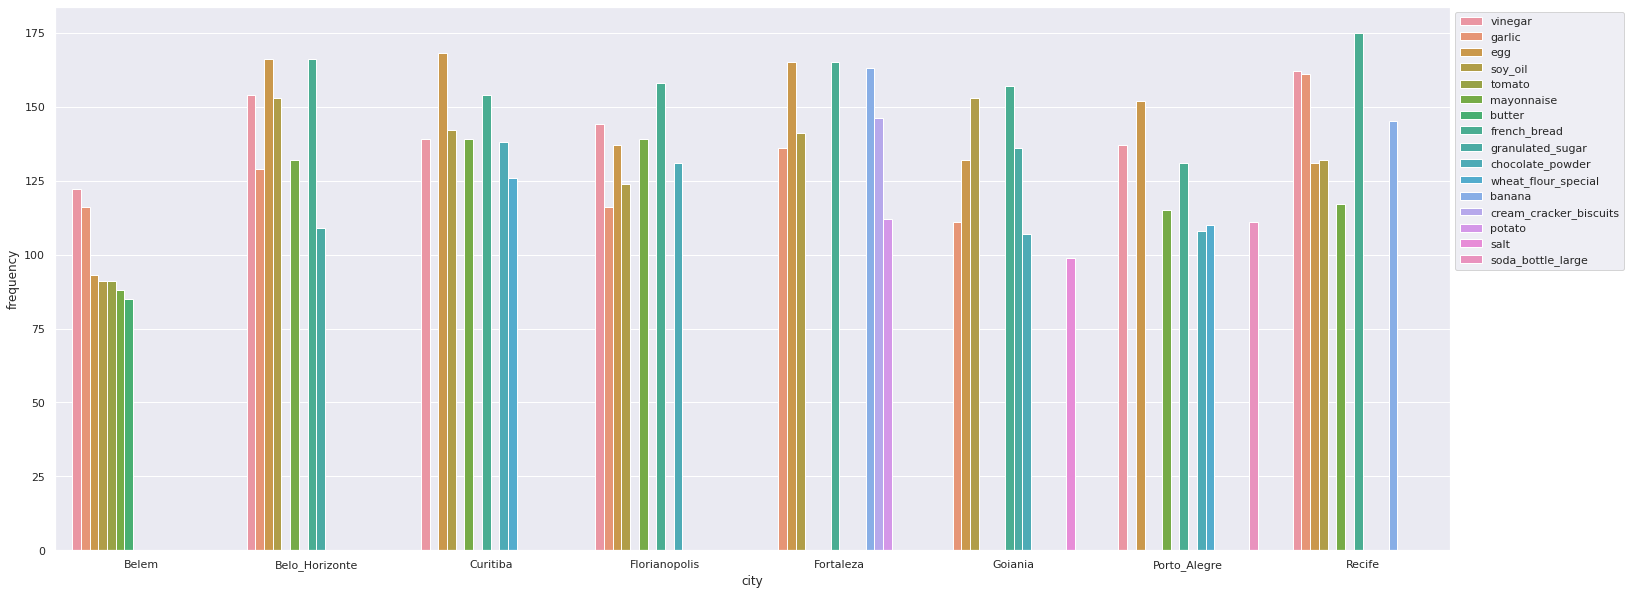

In [13]:
sns.set(rc={'figure.figsize':(25,10)})
a=sns.barplot(x = 'city', y = 'frequency', hue = 'description', data = ces_city_df)
a.legend(loc='upper left',bbox_to_anchor=(1,1))

## **Sort and transforming data to find out the 3 most sold items across the Income group**

In [14]:
#group data by city and process the same
ces_income = ces.groupby(["income"])

ces_income.count()

,id,city,members,description
income,,,,
12_to_18,9846,9846,9846,9846
18_to_25,7186,7186,7186,7186
2.5_to_5,5932,5932,5932,5932
25_to_43,7908,7908,7908,7908
5_to_8,9521,9521,9521,9521
8_to_12,10656,10656,10656,10656
above_43,4820,4820,4820,4820
below_2.5,1991,1991,1991,1991


In [0]:
count=ces_income['description'].value_counts()
ces_income_df = count.to_frame()

ces_income_df.rename(columns = {'description':'0'}, inplace = True)

In [16]:
ces_income_df.reset_index()
ces_income_df.rename(columns = {'0':'frequency'}, inplace = True)

ces_income_df = ces_income_df.sort_values(by=['income','frequency'],ascending=[True, False]).groupby('income').head(7)
ces_income_df=ces_income_df.reset_index()
ces_income_df

,income,description,frequency
0,12_to_18,vinegar,190
1,12_to_18,egg,188
2,12_to_18,french_bread,188
3,12_to_18,mayonnaise,179
4,12_to_18,soy_oil,175
5,12_to_18,garlic,160
6,12_to_18,chocolate_powder,145
7,18_to_25,french_bread,128
8,18_to_25,egg,126
9,18_to_25,vinegar,122


## **Top 7 items sold as per income group**

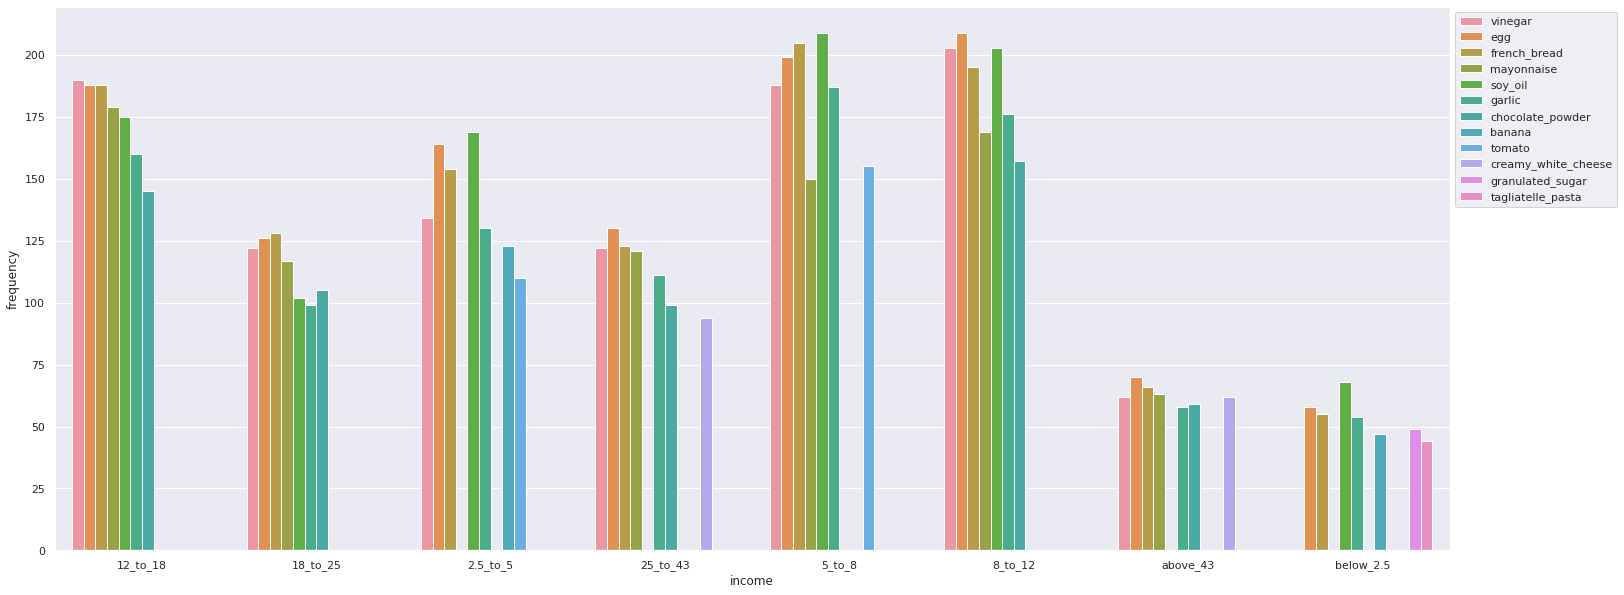

In [17]:
sns.set(rc={'figure.figsize':(25,10)})
a=sns.barplot(x = 'income', y = 'frequency', hue = 'description', data = ces_income_df)
a.legend(loc='upper left',bbox_to_anchor=(1,1))

## **Sort and transforming data to find out the 3 most sold items across the family members group**

In [18]:
#group data by city and process the same
ces_members = ces.groupby(["members"])

ces_members.count()

,id,city,income,description
members,,,,
1,1940,1940,1940,1940
2,8494,8494,8494,8494
3,11886,11886,11886,11886
4,15113,15113,15113,15113
5,10283,10283,10283,10283
6,5413,5413,5413,5413
above_6,4731,4731,4731,4731


In [0]:
count=ces_members['description'].value_counts()
ces_members_df = count.to_frame()

ces_members_df.rename(columns = {'description':'0'}, inplace = True)

In [20]:
ces_members_df.reset_index()
ces_members_df.rename(columns = {'0':'frequency'}, inplace = True)

ces_members_df = ces_members_df.sort_values(by=['members','frequency'],ascending=[True, False]).groupby('members').head(7)
ces_members_df=ces_members_df.reset_index()
ces_members_df

,members,description,frequency
0,1,french_bread,45
1,1,egg,39
2,1,vinegar,37
3,1,garlic,31
4,1,soy_oil,29
5,1,tomato,26
6,1,mayonnaise,25
7,2,egg,185
8,2,vinegar,165
9,2,french_bread,164


## **Top 7 items sold to each income group**

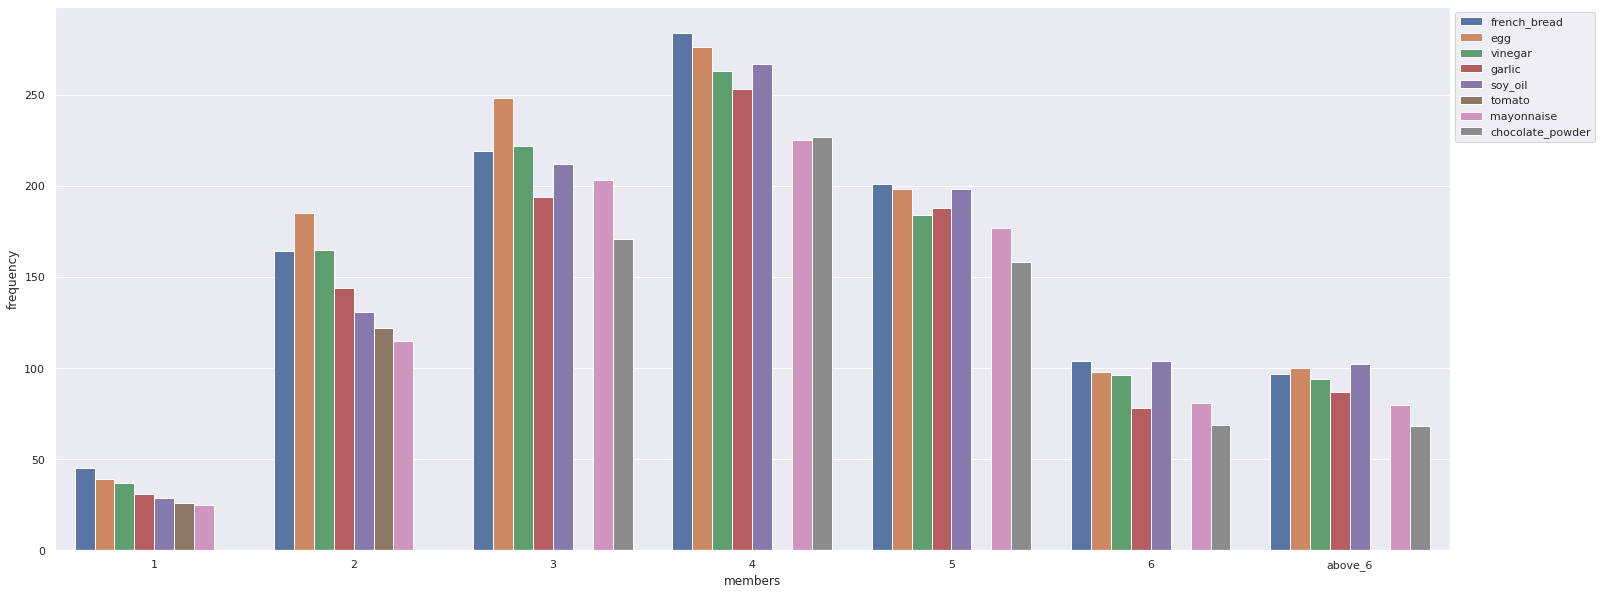

In [21]:
sns.set(rc={'figure.figsize':(25,10)})
a=sns.barplot(x = 'members', y = 'frequency', hue = 'description', data = ces_members_df)
a.legend(loc='upper left',bbox_to_anchor=(1,1))

## **Sort and transforming data to find out the number of members per family across all cities**

In [22]:
#group data by city and process the same
ces_family = ces.groupby(["city"])

ces_family.count()

,id,income,members,description
city,,,,
Belem,6140,6140,6140,6140
Belo_Horizonte,7104,7104,7104,7104
Curitiba,7459,7459,7459,7459
Florianopolis,8361,8361,8361,8361
Fortaleza,7194,7194,7194,7194
Goiania,8138,8138,8138,8138
Porto_Alegre,6847,6847,6847,6847
Recife,6617,6617,6617,6617


In [0]:
count=ces_family['members'].value_counts()
ces_family_df = count.to_frame()

ces_family_df.rename(columns = {'members':'0'}, inplace = True)

In [24]:
ces_family_df.reset_index()
ces_family_df.rename(columns = {'0':'frequency'}, inplace = True)

ces_family_df = ces_family_df.sort_values(by=['city','frequency'],ascending=[True, False]).groupby('city').head(7)
ces_family_df=ces_family_df.reset_index()
ces_family_df

,city,members,frequency
0,Belem,4,1845
1,Belem,3,1323
2,Belem,5,1044
3,Belem,2,893
4,Belem,6,655
5,Belem,above_6,336
6,Belem,1,44
7,Belo_Horizonte,4,1660
8,Belo_Horizonte,5,1421
9,Belo_Horizonte,3,1297


## **Distribution of family size in each city**

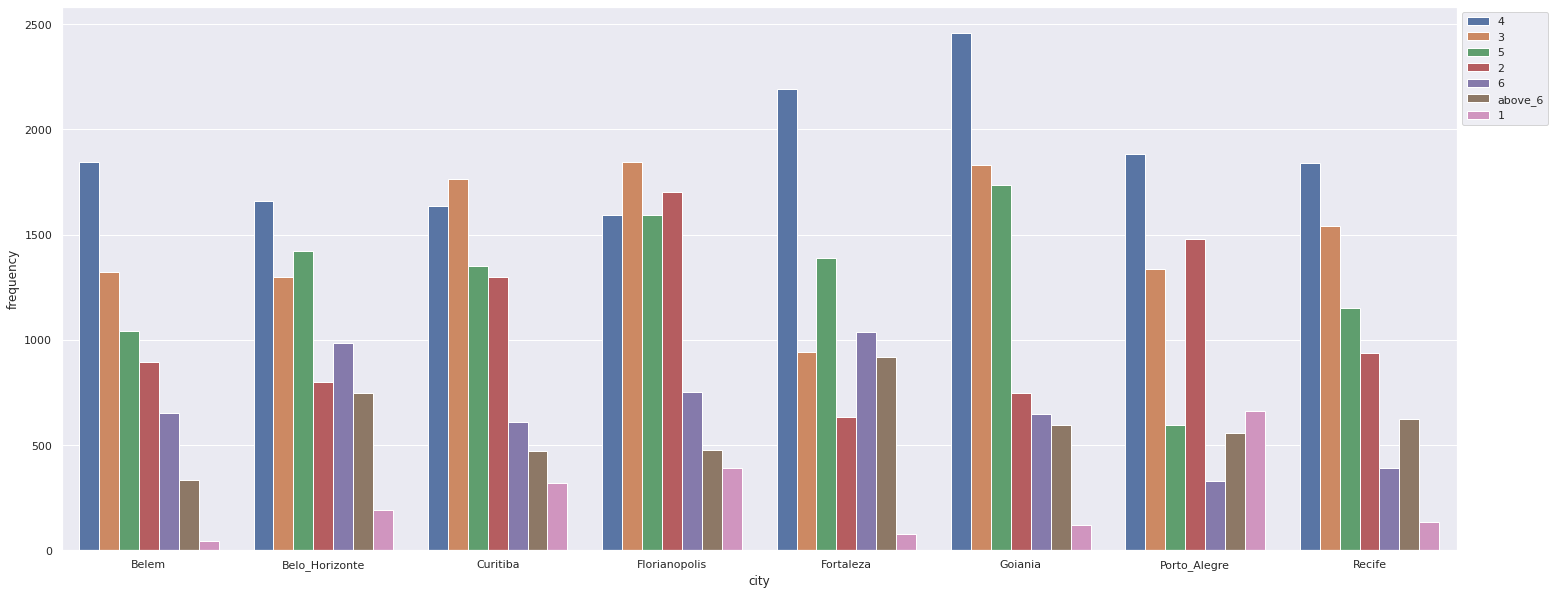

In [25]:
sns.set(rc={'figure.figsize':(25,10)})
a=sns.barplot(x = 'city', y = 'frequency', hue = 'members', data = ces_family_df)
a.legend(loc='upper left',bbox_to_anchor=(1,1))

## **Sort and transforming data to find out the family income across all cities**

In [26]:
#group data by city and process the same
ces_f_income = ces.groupby(["city"])

ces_f_income.count()

,id,income,members,description
city,,,,
Belem,6140,6140,6140,6140
Belo_Horizonte,7104,7104,7104,7104
Curitiba,7459,7459,7459,7459
Florianopolis,8361,8361,8361,8361
Fortaleza,7194,7194,7194,7194
Goiania,8138,8138,8138,8138
Porto_Alegre,6847,6847,6847,6847
Recife,6617,6617,6617,6617


In [0]:
count=ces_f_income['income'].value_counts()
ces_f_income_df = count.to_frame()

ces_f_income_df.rename(columns = {'income':'0'}, inplace = True)

In [28]:
ces_f_income_df.reset_index()
ces_f_income_df.rename(columns = {'0':'frequency'}, inplace = True)

ces_f_income_df = ces_f_income_df.sort_values(by=['city','frequency'],ascending=[True, False]).groupby('city').head(8)
ces_f_income_df=ces_f_income_df.reset_index()
ces_f_income_df

,city,income,frequency
0,Belem,5_to_8,1398
1,Belem,8_to_12,1108
2,Belem,25_to_43,1025
3,Belem,12_to_18,848
4,Belem,18_to_25,692
5,Belem,2.5_to_5,522
6,Belem,above_43,325
7,Belem,below_2.5,222
8,Belo_Horizonte,8_to_12,1485
9,Belo_Horizonte,12_to_18,1392


## **Distribution of income level of families across all cities**

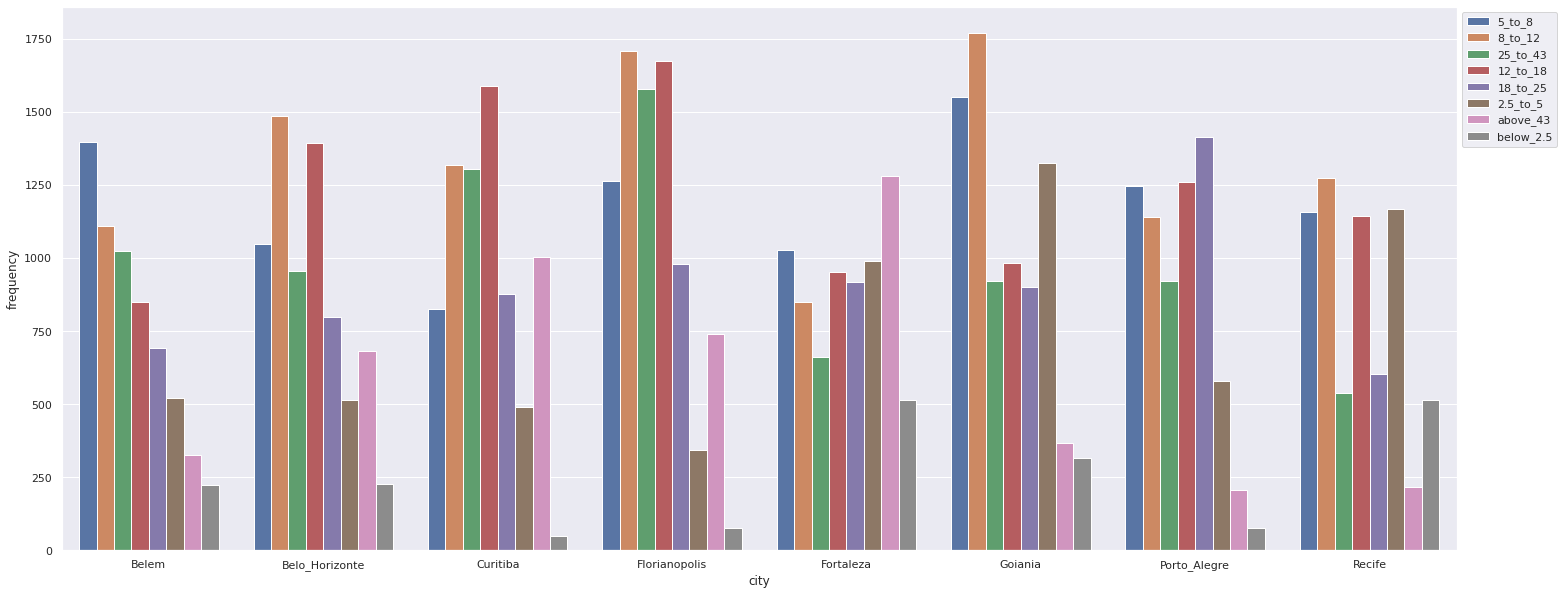

In [29]:
sns.set(rc={'figure.figsize':(25,10)})
a=sns.barplot(x = 'city', y = 'frequency', hue = 'income', data = ces_f_income_df)
a.legend(loc='upper left',bbox_to_anchor=(1,1))

## **Sort and transforming data to find out the income levels prevalent in a city**

In [30]:
#group data by city and process the same
ces_f_income1 = ces.groupby(["city"])

ces_f_income1.count()

,id,income,members,description
city,,,,
Belem,6140,6140,6140,6140
Belo_Horizonte,7104,7104,7104,7104
Curitiba,7459,7459,7459,7459
Florianopolis,8361,8361,8361,8361
Fortaleza,7194,7194,7194,7194
Goiania,8138,8138,8138,8138
Porto_Alegre,6847,6847,6847,6847
Recife,6617,6617,6617,6617


In [0]:
count=ces_f_income1['income'].value_counts()
ces_f_income1_df = count.to_frame()

ces_f_income1_df.rename(columns = {'income':'0'}, inplace = True)

In [32]:
ces_f_income1_df.reset_index()
ces_f_income1_df.rename(columns = {'0':'frequency'}, inplace = True)

ces_f_income1_df = ces_f_income1_df.sort_values(by=['income','frequency'],ascending=[True, False]).groupby('income').head(8)
ces_f_income1_df=ces_f_income1_df.reset_index()
ces_f_income1_df

,city,income,frequency
0,Florianopolis,12_to_18,1675
1,Curitiba,12_to_18,1590
2,Belo_Horizonte,12_to_18,1392
3,Porto_Alegre,12_to_18,1260
4,Recife,12_to_18,1145
5,Goiania,12_to_18,983
6,Fortaleza,12_to_18,953
7,Belem,12_to_18,848
8,Porto_Alegre,18_to_25,1413
9,Florianopolis,18_to_25,980


## **Ranking of cities by income group**

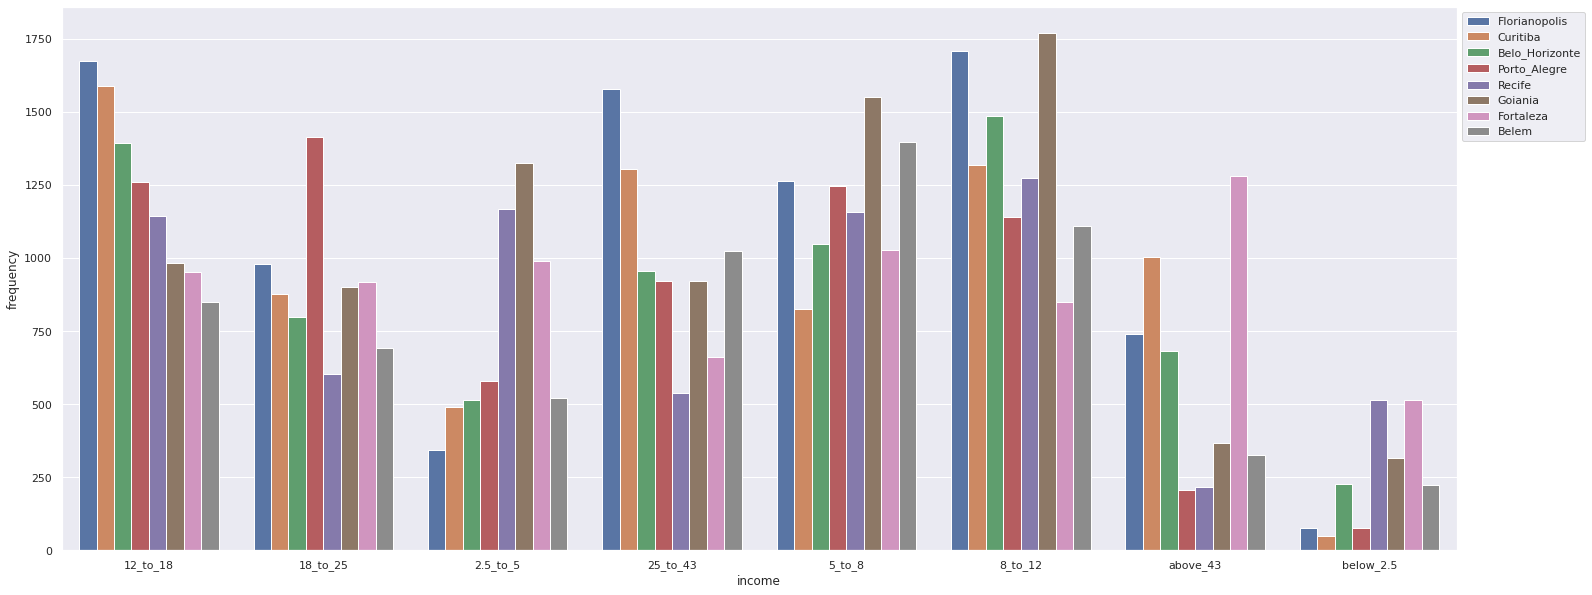

In [33]:
sns.set(rc={'figure.figsize':(25,10)})
a=sns.barplot(x = 'income', y = 'frequency', hue = 'city', data = ces_f_income1_df)
a.legend(loc='upper left',bbox_to_anchor=(1,1))


In [34]:
ces1=ces
ces1['quantity']=1
ces1

,id,city,income,members,description,quantity
0,10001,Belem,25_to_43,4,beef_liver,1
1,10001,Belem,25_to_43,4,beer_snacks,1
2,10001,Belem,25_to_43,4,beetroot,1
3,10001,Belem,25_to_43,4,black_grapes,1
4,10001,Belem,25_to_43,4,borlotti_beans,1
...,...,...,...,...,...,...
57855,90200,Recife,2.5_to_5,4,soy_oil,1
57856,90200,Recife,2.5_to_5,4,sun_dried_silverside,1
57857,90200,Recife,2.5_to_5,4,tagliatelle_pasta,1
57858,90200,Recife,2.5_to_5,4,tomato_pulp,1
